In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import graphviz
from sklearn import preprocessing,model_selection
import itertools

In [29]:
fileaddress = 'C:/Users/Vandoris/kaggle/Give Me Some Credit'
train_df = pd.read_csv(fileaddress+'/cs-training.csv')
test_df = pd.read_csv(fileaddress+'/cs-test.csv')
print ("training dataset shape is {}".format(train_df.shape))
print ("testing dataset shape is {}".format(test_df.shape))

training dataset shape is (150000, 12)
testing dataset shape is (101503, 12)


In [30]:
col_names = train_df.columns.values
col_names[0] = 'ID' ## rename first column to ID
train_df.columns = col_names ## assign new column name to training dataset
test_df.columns = col_names ## assign new column name to testing dataset

In [31]:
print ("Take a peek at training dataset")
train_df.head()

Take a peek at training dataset


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [32]:
print ("Take a peek at testing dataset")
test_df.head()

Take a peek at testing dataset


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [33]:
print(train_df.dtypes)

ID                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


In [34]:
print(test_df.dtypes)

ID                                        int64
SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


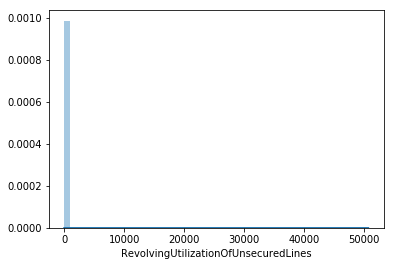

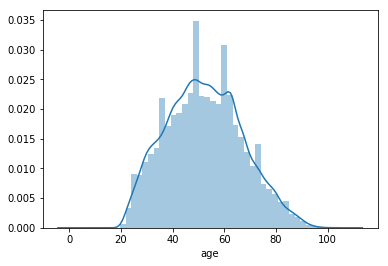

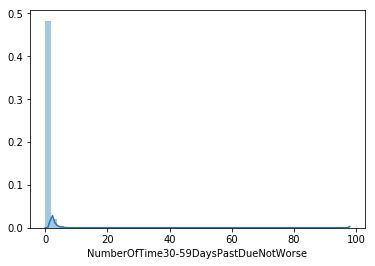

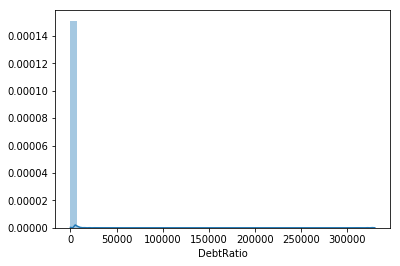

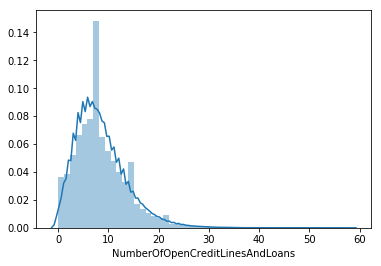

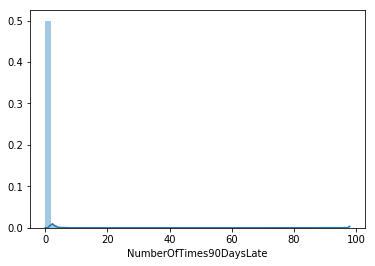

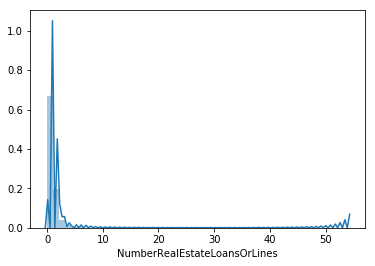

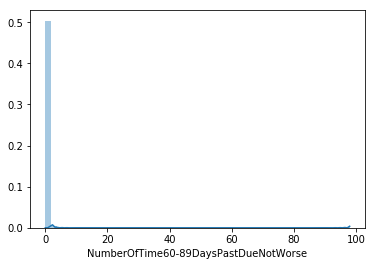

In [35]:
# remove ID, target variable Dlqin2yrs and variables with missing values
feature_list=list(train_df.columns.values)
remove_list = ['ID','SeriousDlqin2yrs','MonthlyIncome','NumberOfDependents']
for each in remove_list:
    feature_list.remove(each)

for each in feature_list:
    sns.distplot(train_df[each])
    plt.show()

In [36]:
print (train_df.columns.values)

['ID' 'SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfDependents']


In [37]:
log_trans_list = train_df.columns.values[[2,4,5,8,9,10]]
log_trans_list
for each in log_trans_list:
    train_df[each] = np.log(1+train_df[each].values)

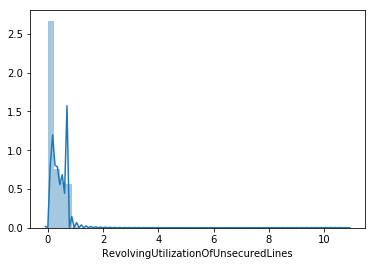

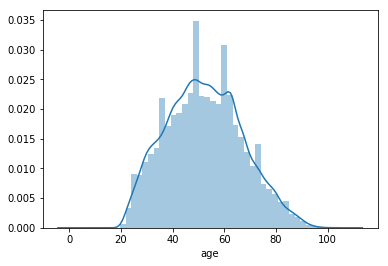

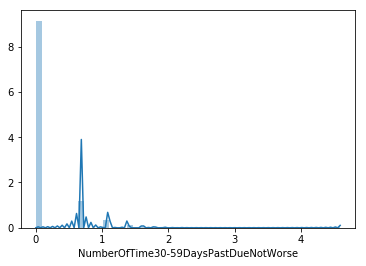

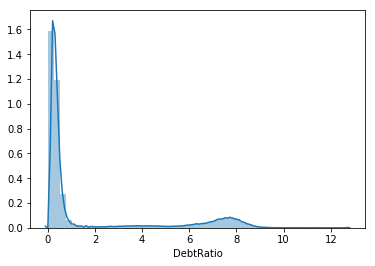

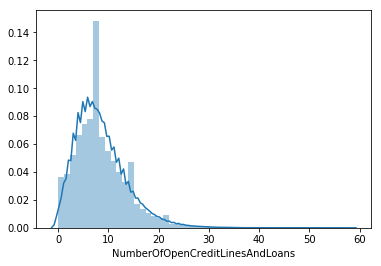

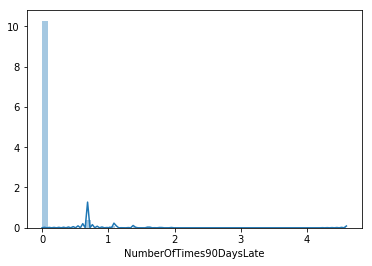

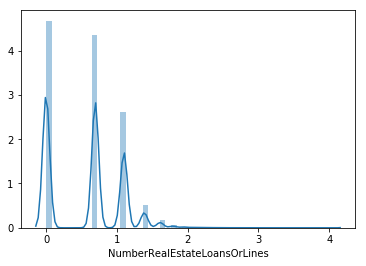

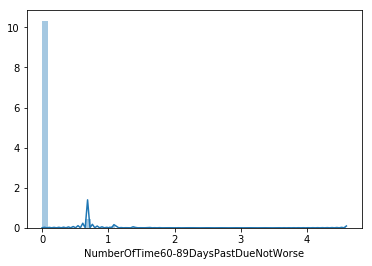

In [38]:
for each in feature_list:
    sns.distplot(train_df[each])
    plt.show()

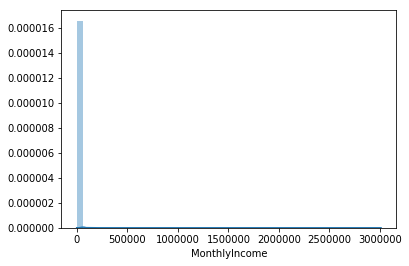

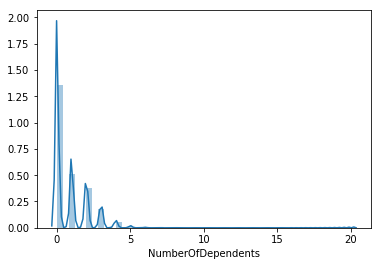

In [39]:
partial_train_df = train_df[['MonthlyIncome','NumberOfDependents']]
#partial_train_df.dropna(how='any')
partial_train_df = partial_train_df.dropna(how='any')

sns.distplot(partial_train_df['MonthlyIncome'])
plt.show()
sns.distplot(partial_train_df['NumberOfDependents'])
plt.show()

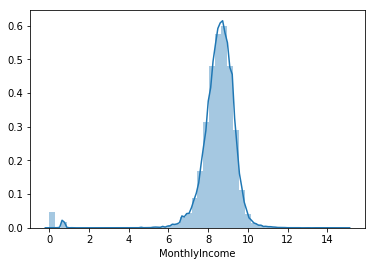

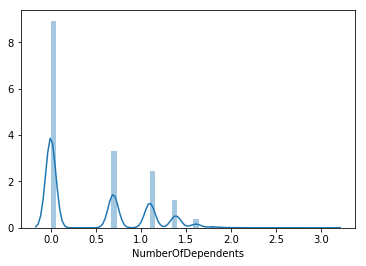

In [40]:
partial_train_df['MonthlyIncome'] = np.log(1+partial_train_df['MonthlyIncome'].values)
partial_train_df['NumberOfDependents'] = np.log(1+partial_train_df['NumberOfDependents'].values)
sns.distplot(partial_train_df['MonthlyIncome'])
plt.show()
sns.distplot(partial_train_df['NumberOfDependents'])
plt.show()

In [41]:
train_df['MonthlyIncome'] = np.log(1+train_df['MonthlyIncome'].values)
train_df['NumberOfDependents'] = np.log(1+train_df['NumberOfDependents'].values)

In [42]:
print (pd.isnull(train_df).sum(axis=0))

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [43]:
print (pd.isnull(test_df).sum(axis=0))

ID                                           0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64


In [44]:
train_df['MonthlyIncome_Null'] = pd.isnull(train_df['MonthlyIncome'])
grouped_df = train_df.groupby('MonthlyIncome_Null')
Dlqin = grouped_df['SeriousDlqin2yrs'].aggregate(np.mean).reset_index()
Dlqin

,MonthlyIncome_Null,SeriousDlqin2yrs
0,False,0.069486
1,True,0.056137


In [45]:
train_df['NoD_Null'] = pd.isnull(train_df['NumberOfDependents'])
grouped_df = train_df.groupby('NoD_Null')
Dlqin = grouped_df['SeriousDlqin2yrs'].aggregate(np.mean).reset_index()
Dlqin

,NoD_Null,SeriousDlqin2yrs
0,False,0.067410
1,True,0.045617


In [46]:
print(train_df.shape,type(train_df))
train_df.dropna(axis=0,how='any',subset=['NumberOfDependents'],inplace=True)
train_df.reset_index()
print(train_df.shape)
pd.isnull(train_df).sum(axis=0)

(150000, 14) <class 'pandas.core.frame.DataFrame'>
(146076, 14)


ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           25807
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
MonthlyIncome_Null                          0
NoD_Null                                    0
dtype: int64

In [47]:
#print(set(train_df['NumberOfDependents']))
#print(set(train_df['NumberOfDependents']+1))

train_df['IncomePerPerson'] = train_df['MonthlyIncome']/(train_df['NumberOfDependents']+1)
test_df['IncomePerPerson'] = test_df['MonthlyIncome']/(test_df['NumberOfDependents']+1)
train_df['NumOfPastDue'] = train_df['NumberOfTimes90DaysLate']+train_df['NumberOfTime60-89DaysPastDueNotWorse'] +train_df['NumberOfTime30-59DaysPastDueNotWorse']
test_df['NumOfPastDue'] = test_df['NumberOfTimes90DaysLate']+test_df['NumberOfTime60-89DaysPastDueNotWorse'] +test_df['NumberOfTime30-59DaysPastDueNotWorse']
train_df['MonthlyDebt'] = train_df['DebtRatio']*train_df['MonthlyIncome']
test_df['MonthlyDebt'] = test_df['DebtRatio']*test_df['MonthlyIncome']
train_df['NumOfOpenCreditLines'] = train_df['NumberOfOpenCreditLinesAndLoans']-train_df['NumberRealEstateLoansOrLines']
test_df['NumOfOpenCreditLines'] = test_df['NumberOfOpenCreditLinesAndLoans']-test_df['NumberRealEstateLoansOrLines']
train_df['MonthlyBalance'] = train_df['MonthlyIncome']-train_df['MonthlyDebt']
test_df['MonthlyBalance'] = test_df['MonthlyIncome']-test_df['MonthlyDebt']

    age      mean  count
0     0  0.000000      1
1    21  0.078947    152
2    22  0.073232    396
3    23  0.113523    599
4    24  0.119737    760
5    25  0.122112    909
6    26  0.124564   1148
7    27  0.126365   1282
8    28  0.131579   1520
9    29  0.106434   1663
10   30  0.109062   1898
11   31  0.106647   2016
12   32  0.113636   2024
13   33  0.109009   2220
14   34  0.097975   2123
15   35  0.107949   2214
16   36  0.099872   2343
17   37  0.090800   2489
18   38  0.089650   2599
19   39  0.093761   2965
20   40  0.085322   3059
21   41  0.094376   3094
22   42  0.093259   3056
23   43  0.085714   3185
24   44  0.073916   3274
25   45  0.081556   3470
26   46  0.086885   3660
27   47  0.082539   3671
28   48  0.075916   3741
29   49  0.081703   3782
..  ...       ...    ...
54   74  0.028281   1379
55   75  0.017979   1168
56   76  0.017953   1114
57   77  0.017442   1032
58   78  0.023232    990
59   79  0.024044    915
60   80  0.021898    822
61   81  0.012640    712


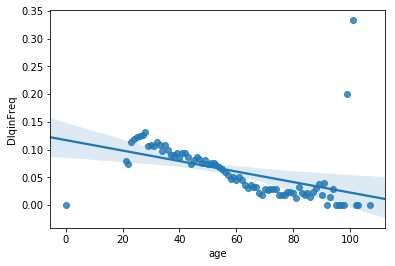

In [48]:
grouped_df = train_df.groupby('age')
dlinq_age = grouped_df['SeriousDlqin2yrs'].aggregate([np.mean,'count']).reset_index()
print(dlinq_age)
dlinq_age.columns =['age','DlqinFreq','count']
sns.regplot(x='age',y='DlqinFreq',data=dlinq_age)
plt.show()

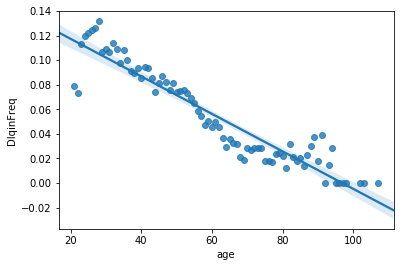

In [49]:
## remove outlier
train_df = train_df[train_df['age'] != 0]
train_df = train_df[train_df['age'] !=99]
train_df = train_df[train_df['age'] !=101]
grouped_df = train_df.groupby('age')
dlinq_age = grouped_df['SeriousDlqin2yrs'].aggregate([np.mean,'count']).reset_index()
dlinq_age.columns =['age','DlqinFreq','count']
sns.regplot(x='age',y='DlqinFreq',data=dlinq_age)
plt.show()

## create new features
train_df['age_sqr'] = train_df['age'].values^2 
## apply the same operation on testing set
test_df['age_sqr'] = test_df['age'].values^2

In [50]:
train_y = train_df['SeriousDlqin2yrs']
#'RevolvingUtilizationOfUnsecuredLines'
train_X = train_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False)
test_X = test_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False)
print(type(train_y))
skf = model_selection.StratifiedKFold(n_splits=5,random_state=100)
xgb_params = {
'eta':0.03,
'max_depth':4,
'sub_sample':0.9,
'colsample_bytree':0.5,
'objective':'binary:logistic',
'eval_metric':'auc',
'silent':0
}

print(train_X.shape)
print(train_X.columns)
print(test_X.shape)

<class 'pandas.core.series.Series'>
(146067, 18)
Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'MonthlyIncome_Null', 'NoD_Null',
       'IncomePerPerson', 'NumOfPastDue', 'MonthlyDebt',
       'NumOfOpenCreditLines', 'MonthlyBalance', 'age_sqr'],
      dtype='object')
(101503, 16)


C:\Users\Vandoris\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.832619	val-auc:0.824707
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.844406	val-auc:0.836156
[2]	train-auc:0.852017	val-auc:0.84492
[3]	train-auc:0.851792	val-auc:0.844967
[4]	train-auc:0.851954	val-auc:0.845753
[5]	train-auc:0.852752	val-auc:0.846459
[6]	train-auc:0.853742	val-auc:0.847591
[7]	train-auc:0.853893	val-auc:0.847696
[8]	train-auc:0.856338	val-auc:0.849547
[9]	train-auc:0.855466	val-auc:0.849017
[10]	train-auc:0.855673	val-auc:0.849345
[11]	train-auc:0.856238	val-auc:0.849887
[12]	train-auc:0.85734	val-auc:0.850792
[13]	train-auc:0.856837	val-auc:0.850175
[14]	train-auc:0.857835	val-auc:0.851825
[15]	train-auc:0.85769	val-auc:0.851436
[16]	train-auc:0.859506	val-auc:0.85304
[17]	train-auc:0.859153	val-auc:0.852923
[18]	train-auc:0.859729	val-auc:0.853457
[19]	train-auc:0.859426	val-auc:0.853394
[20]	train-auc:0.860246	val-auc:0.853804
[21]	train-auc

[196]	train-auc:0.870896	val-auc:0.86078
[197]	train-auc:0.870949	val-auc:0.860797
[198]	train-auc:0.870995	val-auc:0.860825
[199]	train-auc:0.871067	val-auc:0.860831
[200]	train-auc:0.871095	val-auc:0.860841
[201]	train-auc:0.871135	val-auc:0.860858
[202]	train-auc:0.871196	val-auc:0.860891
[203]	train-auc:0.871261	val-auc:0.860906
[204]	train-auc:0.871306	val-auc:0.860927
[205]	train-auc:0.871343	val-auc:0.860957
[206]	train-auc:0.871407	val-auc:0.860989
[207]	train-auc:0.871461	val-auc:0.860998
[208]	train-auc:0.871494	val-auc:0.861023
[209]	train-auc:0.87153	val-auc:0.861025
[210]	train-auc:0.8716	val-auc:0.861098
[211]	train-auc:0.871667	val-auc:0.861162
[212]	train-auc:0.871736	val-auc:0.861157
[213]	train-auc:0.871788	val-auc:0.861176
[214]	train-auc:0.871835	val-auc:0.861158
[215]	train-auc:0.871914	val-auc:0.861182
[216]	train-auc:0.871951	val-auc:0.861202
[217]	train-auc:0.871989	val-auc:0.861202
[218]	train-auc:0.872051	val-auc:0.861281
[219]	train-auc:0.872081	val-auc:0.861

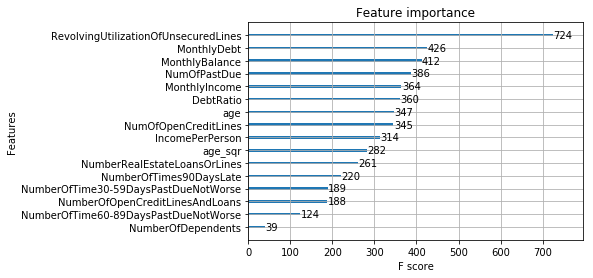

[0]	train-auc:0.828943	val-auc:0.828315
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.843457	val-auc:0.841281
[2]	train-auc:0.853004	val-auc:0.847543
[3]	train-auc:0.854025	val-auc:0.848231
[4]	train-auc:0.852853	val-auc:0.847124
[5]	train-auc:0.853013	val-auc:0.847215
[6]	train-auc:0.854226	val-auc:0.848103
[7]	train-auc:0.855059	val-auc:0.848753
[8]	train-auc:0.855665	val-auc:0.849389
[9]	train-auc:0.855569	val-auc:0.849879
[10]	train-auc:0.855637	val-auc:0.850234
[11]	train-auc:0.855786	val-auc:0.850305
[12]	train-auc:0.856387	val-auc:0.851423
[13]	train-auc:0.856471	val-auc:0.851133
[14]	train-auc:0.857931	val-auc:0.852631
[15]	train-auc:0.857599	val-auc:0.852213
[16]	train-auc:0.859023	val-auc:0.853458
[17]	train-auc:0.858816	val-auc:0.853561
[18]	train-auc:0.85965	val-auc:0.854099
[19]	train-auc:0.859307	val-auc:0.853747
[20]	train-auc:0.859886	val-auc:0.854324
[21]	train-

[196]	train-auc:0.870592	val-auc:0.860625
[197]	train-auc:0.870642	val-auc:0.860665
[198]	train-auc:0.870682	val-auc:0.860718
[199]	train-auc:0.870754	val-auc:0.860745
[200]	train-auc:0.870788	val-auc:0.860781
[201]	train-auc:0.870827	val-auc:0.860784
[202]	train-auc:0.87089	val-auc:0.860788
[203]	train-auc:0.87095	val-auc:0.860805
[204]	train-auc:0.870996	val-auc:0.860842
[205]	train-auc:0.87104	val-auc:0.860855
[206]	train-auc:0.871094	val-auc:0.860872
[207]	train-auc:0.871143	val-auc:0.860916
[208]	train-auc:0.871191	val-auc:0.860924
[209]	train-auc:0.871225	val-auc:0.860904
[210]	train-auc:0.871283	val-auc:0.860935
[211]	train-auc:0.871329	val-auc:0.860956
[212]	train-auc:0.871386	val-auc:0.860969
[213]	train-auc:0.87143	val-auc:0.860981
[214]	train-auc:0.871452	val-auc:0.860996
[215]	train-auc:0.871509	val-auc:0.861012
[216]	train-auc:0.871556	val-auc:0.861024
[217]	train-auc:0.871596	val-auc:0.861016
[218]	train-auc:0.871647	val-auc:0.86105
[219]	train-auc:0.871683	val-auc:0.8610

[393]	train-auc:0.87697	val-auc:0.862143
[394]	train-auc:0.876988	val-auc:0.862142
[395]	train-auc:0.877013	val-auc:0.86214
[396]	train-auc:0.877071	val-auc:0.862156
[397]	train-auc:0.877079	val-auc:0.862154
[398]	train-auc:0.877093	val-auc:0.862158
[399]	train-auc:0.877123	val-auc:0.862153
[400]	train-auc:0.877144	val-auc:0.862157
[401]	train-auc:0.87715	val-auc:0.862155
[402]	train-auc:0.877171	val-auc:0.862158
[403]	train-auc:0.87721	val-auc:0.862167
[404]	train-auc:0.877233	val-auc:0.862162
[405]	train-auc:0.87724	val-auc:0.862158
[406]	train-auc:0.877286	val-auc:0.862178
[407]	train-auc:0.877316	val-auc:0.862166
[408]	train-auc:0.877348	val-auc:0.862164
[409]	train-auc:0.877356	val-auc:0.862159
[410]	train-auc:0.877382	val-auc:0.862167
[411]	train-auc:0.877389	val-auc:0.862167
[412]	train-auc:0.87741	val-auc:0.862166
[413]	train-auc:0.87742	val-auc:0.86217
[414]	train-auc:0.87747	val-auc:0.862213
[415]	train-auc:0.877495	val-auc:0.862212
[416]	train-auc:0.87754	val-auc:0.862206
[4

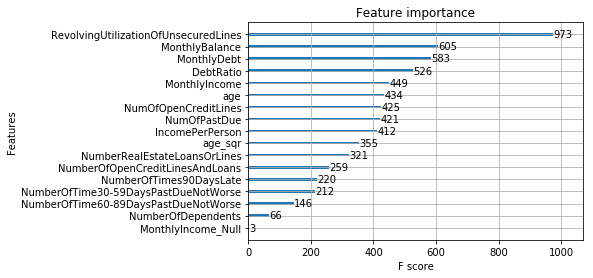

[0]	train-auc:0.827544	val-auc:0.82299
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.842707	val-auc:0.840421
[2]	train-auc:0.847318	val-auc:0.847369
[3]	train-auc:0.849036	val-auc:0.849011
[4]	train-auc:0.84735	val-auc:0.847609
[5]	train-auc:0.847872	val-auc:0.848016
[6]	train-auc:0.848529	val-auc:0.84893
[7]	train-auc:0.850031	val-auc:0.850149
[8]	train-auc:0.850041	val-auc:0.850181
[9]	train-auc:0.851357	val-auc:0.850768
[10]	train-auc:0.852982	val-auc:0.852685
[11]	train-auc:0.85373	val-auc:0.853255
[12]	train-auc:0.854334	val-auc:0.853843
[13]	train-auc:0.854295	val-auc:0.853979
[14]	train-auc:0.856117	val-auc:0.854731
[15]	train-auc:0.855679	val-auc:0.854233
[16]	train-auc:0.857033	val-auc:0.855966
[17]	train-auc:0.856587	val-auc:0.855675
[18]	train-auc:0.857429	val-auc:0.85627
[19]	train-auc:0.856915	val-auc:0.855746
[20]	train-auc:0.857984	val-auc:0.856735
[21]	train-auc:

[196]	train-auc:0.870349	val-auc:0.863156
[197]	train-auc:0.870395	val-auc:0.863168
[198]	train-auc:0.870453	val-auc:0.863158
[199]	train-auc:0.870516	val-auc:0.86321
[200]	train-auc:0.870547	val-auc:0.863218
[201]	train-auc:0.870597	val-auc:0.863207
[202]	train-auc:0.870638	val-auc:0.863228
[203]	train-auc:0.870679	val-auc:0.863269
[204]	train-auc:0.870746	val-auc:0.86328
[205]	train-auc:0.87078	val-auc:0.863329
[206]	train-auc:0.870807	val-auc:0.863341
[207]	train-auc:0.870847	val-auc:0.863326
[208]	train-auc:0.870907	val-auc:0.863353
[209]	train-auc:0.870937	val-auc:0.863355
[210]	train-auc:0.870993	val-auc:0.863394
[211]	train-auc:0.871058	val-auc:0.863441
[212]	train-auc:0.871109	val-auc:0.863489
[213]	train-auc:0.871154	val-auc:0.863522
[214]	train-auc:0.87121	val-auc:0.863531
[215]	train-auc:0.871253	val-auc:0.863545
[216]	train-auc:0.871294	val-auc:0.863574
[217]	train-auc:0.871323	val-auc:0.863582
[218]	train-auc:0.871373	val-auc:0.863602
[219]	train-auc:0.871406	val-auc:0.863

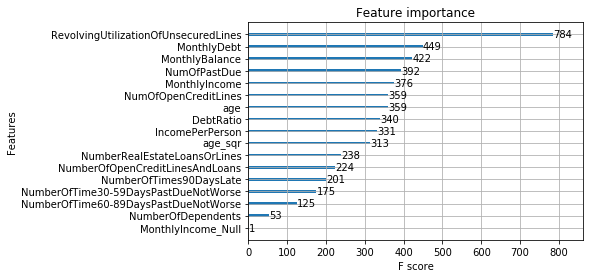

[0]	train-auc:0.828799	val-auc:0.829891
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.843521	val-auc:0.841717
[2]	train-auc:0.851449	val-auc:0.847643
[3]	train-auc:0.851639	val-auc:0.847939
[4]	train-auc:0.851556	val-auc:0.847602
[5]	train-auc:0.852103	val-auc:0.848504
[6]	train-auc:0.853516	val-auc:0.849772
[7]	train-auc:0.854853	val-auc:0.851216
[8]	train-auc:0.854872	val-auc:0.851482
[9]	train-auc:0.854566	val-auc:0.851213
[10]	train-auc:0.855063	val-auc:0.851586
[11]	train-auc:0.855371	val-auc:0.85184
[12]	train-auc:0.855926	val-auc:0.852331
[13]	train-auc:0.855593	val-auc:0.851904
[14]	train-auc:0.857157	val-auc:0.853467
[15]	train-auc:0.856709	val-auc:0.853078
[16]	train-auc:0.8581	val-auc:0.854761
[17]	train-auc:0.857813	val-auc:0.854374
[18]	train-auc:0.858607	val-auc:0.854876
[19]	train-auc:0.858236	val-auc:0.854295
[20]	train-auc:0.859025	val-auc:0.855164
[21]	train-au

[196]	train-auc:0.870181	val-auc:0.862901
[197]	train-auc:0.870241	val-auc:0.86292
[198]	train-auc:0.870313	val-auc:0.862932
[199]	train-auc:0.870375	val-auc:0.86301
[200]	train-auc:0.870419	val-auc:0.86298
[201]	train-auc:0.870467	val-auc:0.863001
[202]	train-auc:0.870529	val-auc:0.863035
[203]	train-auc:0.87057	val-auc:0.863062
[204]	train-auc:0.870612	val-auc:0.863101
[205]	train-auc:0.87066	val-auc:0.863144
[206]	train-auc:0.870709	val-auc:0.863216
[207]	train-auc:0.870766	val-auc:0.86322
[208]	train-auc:0.870812	val-auc:0.863235
[209]	train-auc:0.870838	val-auc:0.863259
[210]	train-auc:0.870903	val-auc:0.863307
[211]	train-auc:0.870969	val-auc:0.863338
[212]	train-auc:0.871019	val-auc:0.863374
[213]	train-auc:0.871064	val-auc:0.863395
[214]	train-auc:0.871083	val-auc:0.863388
[215]	train-auc:0.871158	val-auc:0.863411
[216]	train-auc:0.871191	val-auc:0.863442
[217]	train-auc:0.87124	val-auc:0.863484
[218]	train-auc:0.871281	val-auc:0.863516
[219]	train-auc:0.87132	val-auc:0.863544


[392]	train-auc:0.87636	val-auc:0.865246
[393]	train-auc:0.87638	val-auc:0.865262
[394]	train-auc:0.876405	val-auc:0.865252
[395]	train-auc:0.876449	val-auc:0.865252
[396]	train-auc:0.876465	val-auc:0.865253
[397]	train-auc:0.876476	val-auc:0.865249
[398]	train-auc:0.876501	val-auc:0.865242
[399]	train-auc:0.876523	val-auc:0.865252
[400]	train-auc:0.876532	val-auc:0.865257
[401]	train-auc:0.876549	val-auc:0.865257
[402]	train-auc:0.876559	val-auc:0.865248
[403]	train-auc:0.876567	val-auc:0.86525
[404]	train-auc:0.876576	val-auc:0.865241
[405]	train-auc:0.876589	val-auc:0.865241
[406]	train-auc:0.8766	val-auc:0.86524
[407]	train-auc:0.876613	val-auc:0.865247
[408]	train-auc:0.876631	val-auc:0.865251
[409]	train-auc:0.876655	val-auc:0.865254
[410]	train-auc:0.876659	val-auc:0.865257
[411]	train-auc:0.876674	val-auc:0.865272
[412]	train-auc:0.8767	val-auc:0.865288
[413]	train-auc:0.87672	val-auc:0.865282
[414]	train-auc:0.876766	val-auc:0.865268
[415]	train-auc:0.876801	val-auc:0.865283
[

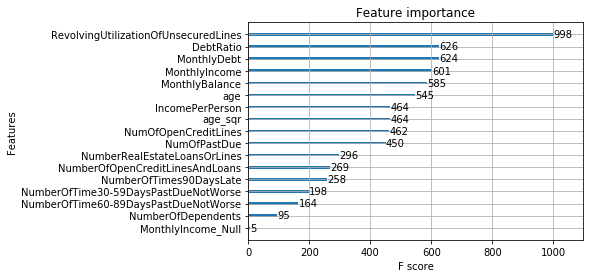

[0]	train-auc:0.82453	val-auc:0.831183
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.840645	val-auc:0.846171
[2]	train-auc:0.845376	val-auc:0.85346
[3]	train-auc:0.847742	val-auc:0.854627
[4]	train-auc:0.849468	val-auc:0.856907
[5]	train-auc:0.850499	val-auc:0.857475
[6]	train-auc:0.851026	val-auc:0.857873
[7]	train-auc:0.852682	val-auc:0.859049
[8]	train-auc:0.852576	val-auc:0.858743
[9]	train-auc:0.852981	val-auc:0.859062
[10]	train-auc:0.854134	val-auc:0.85986
[11]	train-auc:0.854081	val-auc:0.860339
[12]	train-auc:0.854706	val-auc:0.860866
[13]	train-auc:0.854587	val-auc:0.86077
[14]	train-auc:0.855794	val-auc:0.862261
[15]	train-auc:0.855237	val-auc:0.861624
[16]	train-auc:0.856782	val-auc:0.862747
[17]	train-auc:0.856462	val-auc:0.862585
[18]	train-auc:0.856992	val-auc:0.862729
[19]	train-auc:0.856879	val-auc:0.862655
[20]	train-auc:0.857651	val-auc:0.863393
[21]	train-auc

[196]	train-auc:0.869136	val-auc:0.870338
[197]	train-auc:0.869183	val-auc:0.87037
[198]	train-auc:0.869259	val-auc:0.870412
[199]	train-auc:0.869335	val-auc:0.87042
[200]	train-auc:0.86938	val-auc:0.870448
[201]	train-auc:0.86942	val-auc:0.870484
[202]	train-auc:0.869471	val-auc:0.870493
[203]	train-auc:0.869516	val-auc:0.87049
[204]	train-auc:0.869578	val-auc:0.870474
[205]	train-auc:0.869627	val-auc:0.870463
[206]	train-auc:0.869661	val-auc:0.87048
[207]	train-auc:0.8697	val-auc:0.870507
[208]	train-auc:0.869762	val-auc:0.87055
[209]	train-auc:0.8698	val-auc:0.870575
[210]	train-auc:0.869879	val-auc:0.870598
[211]	train-auc:0.869944	val-auc:0.870643
[212]	train-auc:0.869974	val-auc:0.870628
[213]	train-auc:0.870013	val-auc:0.870609
[214]	train-auc:0.87005	val-auc:0.870631
[215]	train-auc:0.870088	val-auc:0.870637
[216]	train-auc:0.87013	val-auc:0.870641
[217]	train-auc:0.870155	val-auc:0.870636
[218]	train-auc:0.870223	val-auc:0.870664
[219]	train-auc:0.870259	val-auc:0.870649
[220]

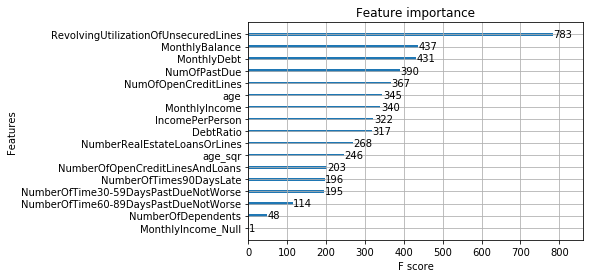

In [51]:
best_iteration =[]
best_score= []
training_score = []
for train_ind,val_ind in skf.split(train_X,train_y):
    #print (set(train_y))
    #print (type(train_y))
    X_train,X_val = train_X.iloc[train_ind,],train_X.iloc[val_ind,]
    y_train,y_val = train_y.iloc[train_ind],train_y.iloc[val_ind]
    #print (set(train_y))
    #print (max(train_ind),min(train_ind),max(val_ind),min(val_ind))
    #print (train_ind,val_ind)
    #print(set(y_train))
    dtrain = xgb.DMatrix(X_train,y_train,feature_names = X_train.columns)
    dval = xgb.DMatrix(X_val,y_val,feature_names = X_val.columns)
    model = xgb.train(xgb_params,dtrain,num_boost_round=1000,
                      evals=[(dtrain,'train'),(dval,'val')],verbose_eval=True,early_stopping_rounds=30)
    best_iteration.append(model.attributes()['best_iteration'])
    best_score.append(model.attributes()['best_score'])
    # training_score.append(model.attributes()['best_msg'].split()[1][-8:])
    xgb.plot_importance(model)
    plt.show()

In [52]:
try:
    train_X.drop(['MonthlyIncome_Null','NoD_Null'],axis=1,inplace=True)
    train_df.drop(['MonthlyIncome_Null','NoD_Null'],axis=1,inplace=True)
except ValueError:
    print ("These features have been dropped")

In [53]:
def xgbCV(eta=[0.05],max_depth=[6],sub_sample=[0.9],colsample_bytree=[0.9]):
    train_y = train_df['SeriousDlqin2yrs'] # label for training data
    train_X = train_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False) # feature for training data
    test_X = test_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False) # feature for testing data
    skf = model_selection.StratifiedKFold(n_splits=5,random_state=100) # stratified sampling
    train_performance ={} 
    val_performance={}
    for each_param in itertools.product(eta,max_depth,sub_sample,colsample_bytree): # iterative over each combination in parameter space
        xgb_params = {
                    'eta':each_param[0],
                    'max_depth':each_param[1],
                    'sub_sample':each_param[2],
                    'colsample_bytree':each_param[3],
                    'objective':'binary:logistic',
                    'eval_metric':'auc',
                    'silent':0
                    }
        best_iteration =[]
        best_score=[]
        training_score=[]
        for train_ind,val_ind in skf.split(train_X,train_y): # five fold stratified cross validation
            X_train,X_val = train_X.iloc[train_ind,],train_X.iloc[val_ind,] # train X and train y
            y_train,y_val = train_y.iloc[train_ind],train_y.iloc[val_ind] # validation X and validation y
            dtrain = xgb.DMatrix(X_train,y_train,feature_names = X_train.columns) # convert into DMatrix (xgb library data structure)
            dval = xgb.DMatrix(X_val,y_val,feature_names = X_val.columns) # convert into DMatrix (xgb library data structure)
            model = xgb.train(xgb_params,dtrain,num_boost_round=1000, 
                              evals=[(dtrain,'train'),(dval,'val')],verbose_eval=False,early_stopping_rounds=30) # train the model
            best_iteration.append(model.attributes()['best_iteration']) # best iteration regarding AUC in valid set
            best_score.append(model.attributes()['best_score']) # best score regarding AUC in valid set
            training_score.append(model.attributes()['best_msg'].split()[1][10:]) # best score regarding AUC in training set
        valid_mean = (np.asarray(best_score).astype(np.float).mean()) # mean AUC in valid set
        train_mean = (np.asarray(training_score).astype(np.float).mean()) # mean AUC in training set
        val_performance[each_param] =  train_mean
        train_performance[each_param] =  valid_mean
        print ("Parameters are {}. Training performance is {:.4f}. Validation performance is {:.4f}".format(each_param,train_mean,valid_mean))
    return (train_performance,val_performance)
#xgbCV(eta=[0.01,0.02,0.03,0.04,0.05],max_depth=[4,6,8,10],colsample_bytree=[0.3,0.5,0.7,0.9]) 
xgbCV(eta=[0.04],max_depth=[4],colsample_bytree=[0.5])

C:\Users\Vandoris\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Parameters are (0.04, 4, 0.9, 0.5). Training performance is 0.8762. Validation performance is 0.8649


({(0.04, 4, 0.9, 0.5): 0.8648556}, {(0.04, 4, 0.9, 0.5): 0.8762234})

In [54]:
print(train_X.columns)
any(train_X.columns == test_X.columns)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'IncomePerPerson', 'NumOfPastDue', 'MonthlyDebt',
       'NumOfOpenCreditLines', 'MonthlyBalance', 'age_sqr'],
      dtype='object')


True

In [55]:
train = xgb.DMatrix(train_X,train_y,feature_names=train_X.columns)
test = xgb.DMatrix(test_X,feature_names=test_X.columns)
xgb_params = {
                    'eta':0.03,
                    'max_depth':4,
                    'sub_sample':0.9,
                    'colsample_bytree':0.5,
                    'objective':'binary:logistic',
                    'eval_metric':'auc',
                    'silent':0
                    }

final_model = xgb.train(xgb_params,train,num_boost_round=500)
ypred = final_model.predict(test)

C:\Users\Vandoris\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


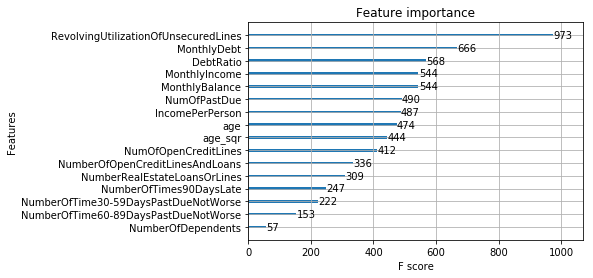

In [56]:
xgb.plot_importance(final_model)
plt.show()